In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Memuat data pelatihan (berisi informasi harga dari beberapa tempat belanja)
training_data = pd.read_csv('training_data.csv')

# Menyiapkan fitur dan label untuk model
features = training_data.drop(['item', 'cheapest_store'], axis=1).values
labels = training_data['cheapest_store'].values

# Normalisasi fitur
features = (features - features.mean()) / features.std()

# One-hot encode the categorical labels
labels = pd.get_dummies(labels)

In [3]:
# Membagi data menjadi data pelatihan dan data validasi
train_size = int(0.8 * len(features))
train_features = features[:train_size]
train_labels = labels[:train_size]
val_features = features[train_size:]
val_labels = labels[train_size:]

In [4]:
# Membangun model menggunakan TensorFlow
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(features.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(labels.shape[1], activation='linear')
])

In [5]:
# Mengkompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')

In [6]:
history = model.fit(train_features, train_labels, epochs=100, batch_size=32, validation_data=(val_features, val_labels))

Epoch 1/100
16/16 [==============================] - 2s 36ms/step - loss: 0.1961 - val_loss: 0.1175
Epoch 2/100
16/16 [==============================] - 0s 7ms/step - loss: 0.0928 - val_loss: 0.0580
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - loss: 0.0487 - val_loss: 0.0282
Epoch 4/100
16/16 [==============================] - 0s 9ms/step - loss: 0.0271 - val_loss: 0.0168
Epoch 5/100
16/16 [==============================] - 0s 12ms/step - loss: 0.0178 - val_loss: 0.0104
Epoch 6/100
16/16 [==============================] - 0s 8ms/step - loss: 0.0126 - val_loss: 0.0073
Epoch 7/100
16/16 [==============================] - 0s 8ms/step - loss: 0.0097 - val_loss: 0.0056
Epoch 8/100
16/16 [==============================] - 0s 7ms/step - loss: 0.0081 - val_loss: 0.0043
Epoch 9/100
16/16 [==============================] - 0s 10ms/step - loss: 0.0072 - val_loss: 0.0037
Epoch 10/100
16/16 [==============================] - 0s 7ms/step - loss: 0.0062 - val_loss: 0.0032
Epoch 

In [10]:
# Mendapatkan riwayat akurasi dan loss
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

KeyError: 'accuracy'

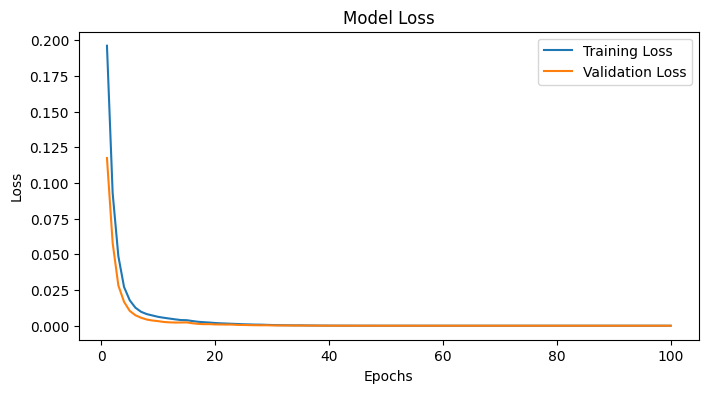

In [8]:
# Membuat plot loss
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [9]:

# Membuat plot akurasi
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

NameError: name 'train_acc' is not defined

<Figure size 800x400 with 0 Axes>

In [8]:
# Menggunakan model untuk memberikan rekomendasi tempat belanja per item
def get_cheapest_stores(features):
    normalized_features = (np.array(features) - np.mean(features)) / np.std(features)
    price_predictions = model.predict(normalized_features.reshape(1, -1))
    cheapest_store_index = np.argmin(price_predictions)
    return training_data['cheapest_store'][cheapest_store_index]

In [9]:
# Contoh penggunaan
user_features = [5, 7, 6]  # Contoh fitur harga item dari pengguna
cheapest_stores = get_cheapest_stores(user_features)
print(f"Rekomendasi tempat belanja dengan harga termurah per item: {cheapest_stores}")

1/1 [==============================] - 0s 51ms/step
Rekomendasi tempat belanja dengan harga termurah per item: Store C
